# Metacells for gut tube RNA seq data
Use diffusion map to iteratively reassign cluster centers via k-medoids

In [1]:
from importlib import reload
import numpy as np
import os
import scanpy as sc

## Load data

In [2]:
data_fname = os.path.join("..", "ot", "data", "pbmc", "rna_10k.h5ad")
ad = sc.read(data_fname)

print(ad)

AnnData object with n_obs × n_vars = 7630 × 15365 
    obs: 'n_genes', 'percent_mito', 'cluster', 'celltype'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'ADT-cols'
    obsm: 'ADT', 'UMAP'


## Cleaning

In [3]:
sc.pp.filter_cells(ad, min_counts=10, inplace=True)
sc.pp.filter_genes(ad, min_counts=10, inplace=True)

print(ad)

AnnData object with n_obs × n_vars = 7630 × 15343 
    obs: 'n_genes', 'percent_mito', 'cluster', 'celltype', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'n_counts'
    uns: 'ADT-cols'
    obsm: 'ADT', 'UMAP'


In [4]:
# store raw data
ad.raw = ad

## Library size normalization and log transform

In [5]:
from scipy.sparse import csr_matrix

# pseudocount for log transformation
ps = 1.

# library size normalization
sc.pp.normalize_total(ad)

# reset data
new_data = np.log(ad.X.data + ps) - np.log(ps)
ad.X = csr_matrix((new_data, ad.X.indices, ad.X.indptr), shape=ad.X.shape)

## Highly variable genes

In [6]:
sc.pp.highly_variable_genes(ad, flavor="cell_ranger", n_top_genes=3000)
print(ad)

AnnData object with n_obs × n_vars = 7630 × 15343 
    obs: 'n_genes', 'percent_mito', 'cluster', 'celltype', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'ADT-cols'
    obsm: 'ADT', 'UMAP'


In [7]:
# basic visualization
sc.tl.pca(ad, use_highly_variable=True)
sc.pp.neighbors(ad)
sc.tl.diffmap(ad)

In [8]:
sc.tl.umap(ad)

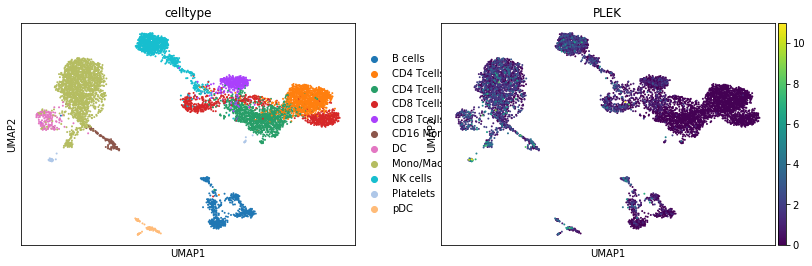

In [587]:
sc.pl.umap(ad, color=["celltype", "PLEK"])

# Metacells

In [173]:
import diffkm

In [470]:
reload(diffkm)

model = diffkm.diffkm(ad.obsm["X_pca"], verbose=False)
model.initialize_kernel_rbf_parallel(25)

In [334]:
model.compute_transition_probabilities()
model.compute_diffusion_map(15, 5)

In [335]:
model.cluster(400, 6, epsilon=1e-2)
#model.centers = np.random.choice(range(ad.shape[0]), 200)
#model.assign_soft_clusters()

Initializing residual matrix...
Exponent: 0
Exponent: 1
Exponent: 2
Exponent: 3
Exponent: 4
Exponent: 5
Initializing f and g...



Computing denominator...
Computing full matrix...
Current midpoint:  200
Error:  0.017571939332550225
Computing denominator...
Computing full matrix...
Current midpoint:  300
Error:  0.009517113491932565
Computing denominator...
Computing full matrix...
Current midpoint:  250
Error:  0.012113710593961479
Computing denominator...
Computing full matrix...
Current midpoint:  275
Error:  0.01077833025462394
Computing denominator...
Computing full matrix...
Current midpoint:  287
Error:  0.010148209596736119
Computing denominator...
Computing full matrix...
Current midpoint:  293
Error:  0.009852296535133224
Computing denominator...
Computing full matrix...
Current midpoint:  290
Error:  0.0099706496997075
Computing denominator...
Computing full matrix...
Current midpoint:  288
Error:  0.010060650278388603
Computing denominator...
Computing full matrix...
Current midpoint:  289
Error:  0.010007542673602978
Search complete. Required metacells:  289


# Try RSP

In [471]:
import rsp

In [557]:
reload(rsp)

rsp_model = rsp.rsp(verbose=True)
rsp_model.fit(model.M, min_size=25)

Modularity:  0.35380597968482885
Modularity:  0.29337291197228266
Modularity:  0.26500268342811556
Modularity:  0.2805655116648716
Modularity:  0.33896874944951244
Modularity:  0.2692001492288375
Modularity:  0.34190993005921305
Modularity:  0.3588894623960629
Modularity:  0.34559471024543614
Modularity:  0.3356998501001243
Modularity:  0.32301656378386767
Modularity:  0.3128059407703138
Modularity:  0.25
Modularity:  0.2428892048994997
Modularity:  0.22593399517318766
Modularity:  0.3241343240228393
Modularity:  0.33925453349854434
Modularity:  0.3106744267314297
Modularity:  0.19644731856401368
Modularity:  0.2963077625592089
Modularity:  0.3149007134503605
Modularity:  0.31953746241496234
Modularity:  0.3479141298012642
Modularity:  0.31806578906486777
Modularity:  0.3589425831968319
Modularity:  0.25
Modularity:  0.19551789741912157
Modularity:  0.17683988967919873
Modularity:  0.22366517615917728
Modularity:  0.26297088363752347
Modularity:  0.22176476766201308
Modularity:  0.1864

Modularity:  0.23314477811116116
Modularity:  0.21746556126027553
Modularity:  0.19816246942957239
Modularity:  0.18136238632610552
Modularity:  0.1893528620864467
Modularity:  0.2753931090299457
Modularity:  0.2479689919362947
Modularity:  0.2332716049382716
Modularity:  0.23236634312287383
Modularity:  0.23336472423085963
Modularity:  0.27081095596133187
Modularity:  0.2259776901141374
Modularity:  0.23182191904009455
Modularity:  0.2585663895187705
Modularity:  0.21497315296566075
Modularity:  0.21003926625515693
Modularity:  0.23830636198412664
Modularity:  0.22621148568356722
Modularity:  0.23045252448809347
Modularity:  0.23791003292506793
Modularity:  0.23832947530864193
Modularity:  0.24544446137953224
Modularity:  0.23335798816568046
Modularity:  0.2264440808341872
Modularity:  0.240650572924227
Modularity:  0.2479238343141693
Modularity:  0.22136556517090444
Modularity:  0.29037851763773287
Modularity:  0.23057329493622464
Modularity:  0.2790630307455437
Modularity:  0.246082

In [558]:
assgt = rsp_model.compressed

print(len(set(assgt)))

519


# Check approximation error

In [310]:
# try fake centers
fake_centers = np.random.choice(range(model.n), 130, replace=False)
proj = diffkm.get_projection(model.A, model.A[:,model.centers])
fake_proj = diffkm.get_projection(model.A, model.A[:,fake_centers])

Computing denominator...
Computing full matrix...
Computing denominator...
Computing full matrix...


In [319]:
from scipy.sparse.linalg import eigs
w, v = eigs(fake_proj, k=15)

In [320]:
w

array([0.9978002635+0.j, 0.9902829811+0.j, 0.9765530994+0.j,
       0.9631450847+0.j, 0.9309661401+0.j, 0.9100207382+0.j,
       0.8836541655+0.j, 0.8525009519+0.j, 0.8051122984+0.j,
       0.8001102967+0.j, 0.7905370075+0.j, 0.6971031031+0.j,
       0.6838344415+0.j, 0.6201950709+0.j, 0.6010634339+0.j])

In [318]:
model.eigenvalues**7

array([1.          +0.j, 0.9988840227+0.j, 0.9887705101+0.j,
       0.9782775322+0.j, 0.976649942 +0.j, 0.9379496419+0.j,
       0.9200005606+0.j, 0.8840914746+0.j, 0.8763447898+0.j,
       0.8488913251+0.j, 0.8138917635+0.j, 0.8077362178+0.j,
       0.7988698603+0.j, 0.785556926 +0.j, 0.7362079973+0.j])

In [183]:
# show approximation error
from scipy.sparse.linalg import norm
og_norm = norm(model.A)
error = norm(model.A - proj)
fake_error = norm(model.A - fake_proj)

print("Norm of original matrix: ", og_norm)
print("Error of approximation: ", error)
print("Error of projection w random centers: ", fake_error)

Norm of original matrix:  3.132839131186614
Error of approximation:  0.0030982688812149803
Error of projection w random centers:  0.12201550724193926


# Visualization

In [490]:
print(model.compute_modularity())

AttributeError: 'diffkm' object has no attribute 'assignments_bool'

Minimum metacell size: 13


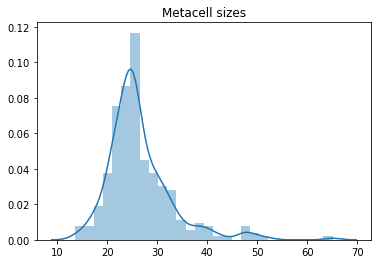

In [336]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(model.get_soft_metacell_sizes())
plt.title("Metacell sizes")

print("Minimum metacell size: %d" % min(model.get_soft_metacell_sizes()))

In [534]:
sc.tl.leiden(ad, resolution=10000.)

In [535]:
len(ad.obs.leiden.unique())

7630

In [474]:
ad.obs["assgt"] = np.array(assgt).astype(str)

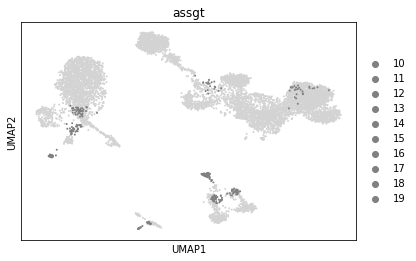

In [476]:
sc.pl.umap(ad, color=["assgt"], groups=[str(_) for _ in range(10,20)])

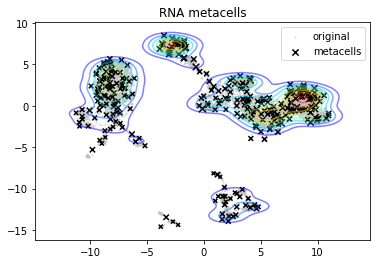

In [338]:
import matplotlib.pyplot as plt
import seaborn as sns

sizes = model.get_soft_metacell_sizes()

key = "X_umap"
ix1 = 0
ix2 = 1

sns.kdeplot(ad.obsm[key][:,ix1], ad.obsm[key][:,ix2], cmap="jet", alpha=0.5)
plt.scatter(ad.obsm[key][:,ix1], ad.obsm[key][:,ix2],
            c="silver",
            s=1., label="original", alpha=0.5)

#coords = model.get_metacell_coordinates(hv_ad.obsm[key], exponent=1)
coords = ad.obsm[key][model.centers,:]
plt.scatter(coords[:,ix1], coords[:,ix2],
           c="k", marker="x", s=sizes, label="metacells")

plt.title("RNA metacells")
plt.legend()

In [339]:
model.centers

array([2064,  750, 7385, 4911, 6259, 7344, 2772, 6803, 6764, 7311, 2109,
       2807, 7194,  664, 2397, 5823, 6052, 2684, 4606, 4634, 3282, 2744,
       3366, 6867, 3070, 6757, 1965, 1513, 6669, 5489, 4191, 4406, 5356,
       6232, 1184,  846, 1083, 3622, 5413, 1001,  904, 7078, 1834, 1916,
       2494, 7549, 1326, 6123, 3098, 2601, 4365, 5334, 1133, 6014, 5690,
       1085, 5060, 7283, 2549, 5943, 6207, 5590, 2608, 2257, 3393, 5201,
       7318, 7533, 2062, 3249, 6179, 3414, 2483,  497, 7448, 7340, 1719,
       4525, 3856, 1804, 7298, 5889, 6138, 5928, 3941,  447, 1074, 7168,
        533, 7223, 4398, 4104,  942,  944, 2101, 5236,   16,  844, 7247,
        837, 2509, 2879, 2022, 1336, 2436, 1366, 5960, 2223, 1464, 3110,
       1011, 3314,  445, 3838, 4476, 3738, 5918,  823, 1150,  556,  948,
       4784, 1549, 1747,  601, 5744, 3950, 1922, 4374, 4667, 6716, 3586,
       1861, 5614, 7249, 4283, 1809, 5179, 1415, 1182, 1396, 4201, 3358,
        552, 1027, 2997, 2771,  773, 4510,  311, 57

# Save AnnData with metacell sizes

In [559]:
metacell_labels = rsp_model.get_metacell_labels(ad.obs.celltype.values)
set(metacell_labels)

{'B cells',
 'CD16 Mono',
 'CD4 Tcells',
 'CD4 Tcells (Mem)',
 'CD8 Tcells',
 'CD8 Tcells (Mem)',
 'DC',
 'Mono/Macro',
 'NK cells',
 'Platelets',
 'pDC'}

In [576]:
#metacell_coords = model.get_metacell_coordinates(ad.raw.X)
# metacell_coords = model.A[model.centers, :].toarray() @ ad.raw.X
metacell_labels = rsp_model.get_metacell_labels(ad.obs.celltype.values)
cloosters = rsp_model.get_metacell_labels(ad.obs.cluster.values)

metacell_coords = rsp_model.get_coordinates(ad.raw.X)
print(metacell_coords.shape)

(519, 15343)


In [577]:
# create new AnnData
metacell_ad = sc.AnnData(metacell_coords)
#metacell_ad.obs = ad[model.centers].obs.copy()
metacell_ad.var = ad.var
metacell_ad.obs["celltype"] = metacell_labels
metacell_ad.obs["cluster"] = cloosters
metacell_ad.obs["size"] = rsp_model.get_metacell_sizes()

# add sizes
#metacell_ad.obs["size"] = model.get_soft_metacell_sizes()
#metacell_ad.obs["celltype"] = metacell_labels

In [578]:
metacell_ad.obs

,celltype,cluster,size
0,pDC,13,21.0
1,CD4 Tcells (Mem),2,19.0
2,B cells,14,11.0
3,pDC,13,8.0
4,CD8 Tcells,6,24.0
...,...,...,...
514,CD4 Tcells (Mem),2,10.0
515,NK cells,3,20.0
516,CD4 Tcells,1,17.0
517,Mono/Macro,0,8.0


In [579]:
metacell_ad.var

,gene_ids,feature_types,genome,n_cells,n_counts,highly_variable,means,dispersions,dispersions_norm
AL627309.1,ENSG00000238009,Gene Expression,GRCh38,12,12.0,False,0.000973,0.669625,0.140140
AL669831.5,ENSG00000237491,Gene Expression,GRCh38,446,459.0,False,0.032577,0.617836,-0.958787
LINC00115,ENSG00000225880,Gene Expression,GRCh38,180,182.0,False,0.013709,0.661456,-0.120162
FAM41C,ENSG00000230368,Gene Expression,GRCh38,298,308.0,False,0.021702,0.628962,-0.646024
NOC2L,ENSG00000188976,Gene Expression,GRCh38,1547,1850.0,False,0.130205,0.613046,0.156935
...,...,...,...,...,...,...,...,...,...
AL592183.1,ENSG00000273748,Gene Expression,GRCh38,737,784.0,False,0.059585,0.646009,0.391850
AC007325.4,ENSG00000278817,Gene Expression,GRCh38,59,59.0,False,0.004452,0.637861,-0.564896
AL354822.1,ENSG00000278384,Gene Expression,GRCh38,30,30.0,False,0.002179,0.678487,0.089164
AC004556.1,ENSG00000276345,Gene Expression,GRCh38,1245,1519.0,False,0.092193,0.558605,-2.469349


# Downstream analysis to make sure things look ok

In [598]:
metacell_ad_2 = metacell_ad.copy()

# normalization
sc.pp.normalize_total(metacell_ad_2)
sc.pp.log1p(metacell_ad_2)

# dim reduction
sc.tl.pca(metacell_ad_2, use_highly_variable=True)
sc.pp.neighbors(metacell_ad_2, n_neighbors=15)
sc.tl.diffmap(metacell_ad_2)

# visualization
sc.tl.umap(metacell_ad_2)

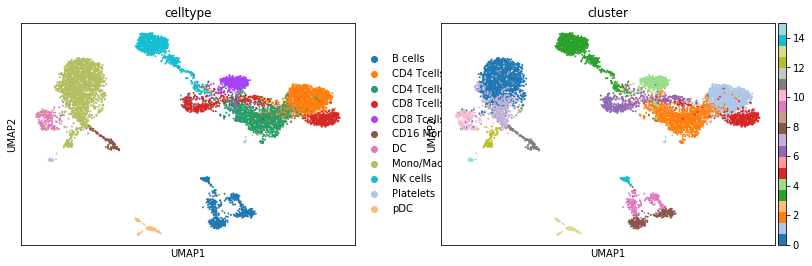

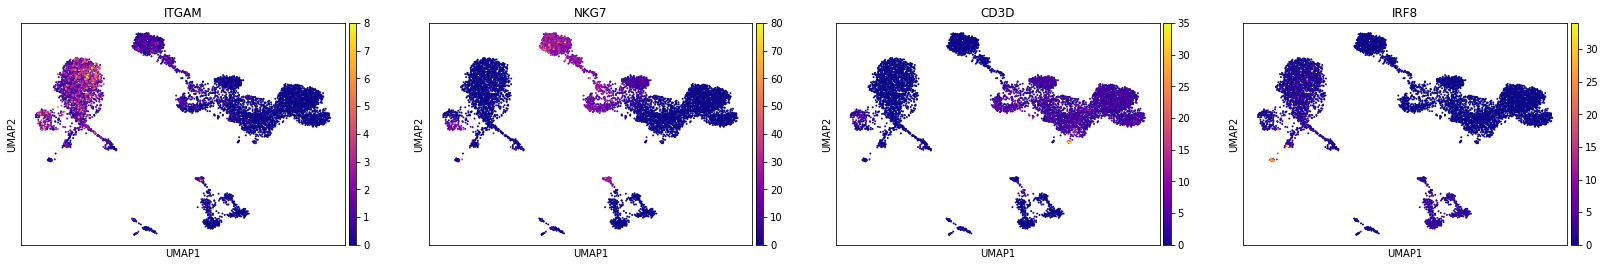

In [604]:
gns = ["ITGAM", "NKG7", "CD3D", "IRF8"]
sc.pl.umap(ad, color=["celltype", "cluster"], color_map="tab20")
sc.pl.umap(ad, color=gns, color_map="plasma")

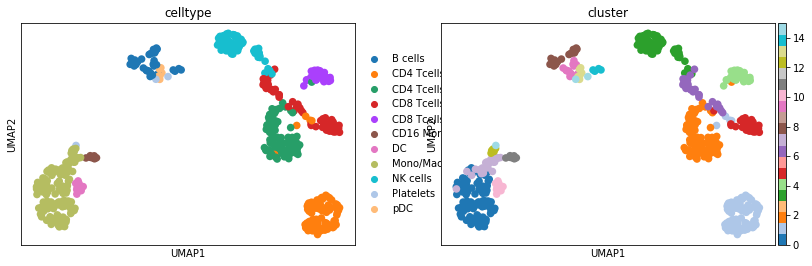

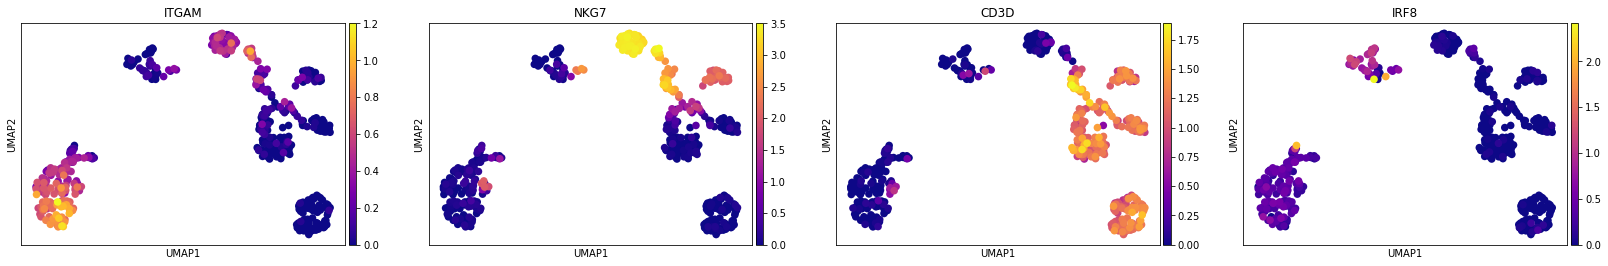

In [602]:
sc.pl.umap(metacell_ad_2, color=["celltype", "cluster"], color_map="tab20")
sc.pl.umap(metacell_ad_2, color=gns, use_raw=False, color_map="plasma")

In [605]:
"CD41" in ad.var_names

False

In [584]:
# show gene heatmaps
gene_names = ad.var_names[ad.var.highly_variable.values]
# sort expressions
expr = np.array(ad[:,gene_names].X.sum(axis=0).reshape(1,-1)).squeeze(0)
sel = np.argsort(np.argsort(-expr)) < 150

gene_names = gene_names[sel]

full_submatrix = ad[:,gene_names].X.toarray()
full_cov = np.cov(full_submatrix.T)

metacell_submatrix = metacell_ad_2[:, gene_names].X
metacell_cov = np.cov(metacell_submatrix.T)

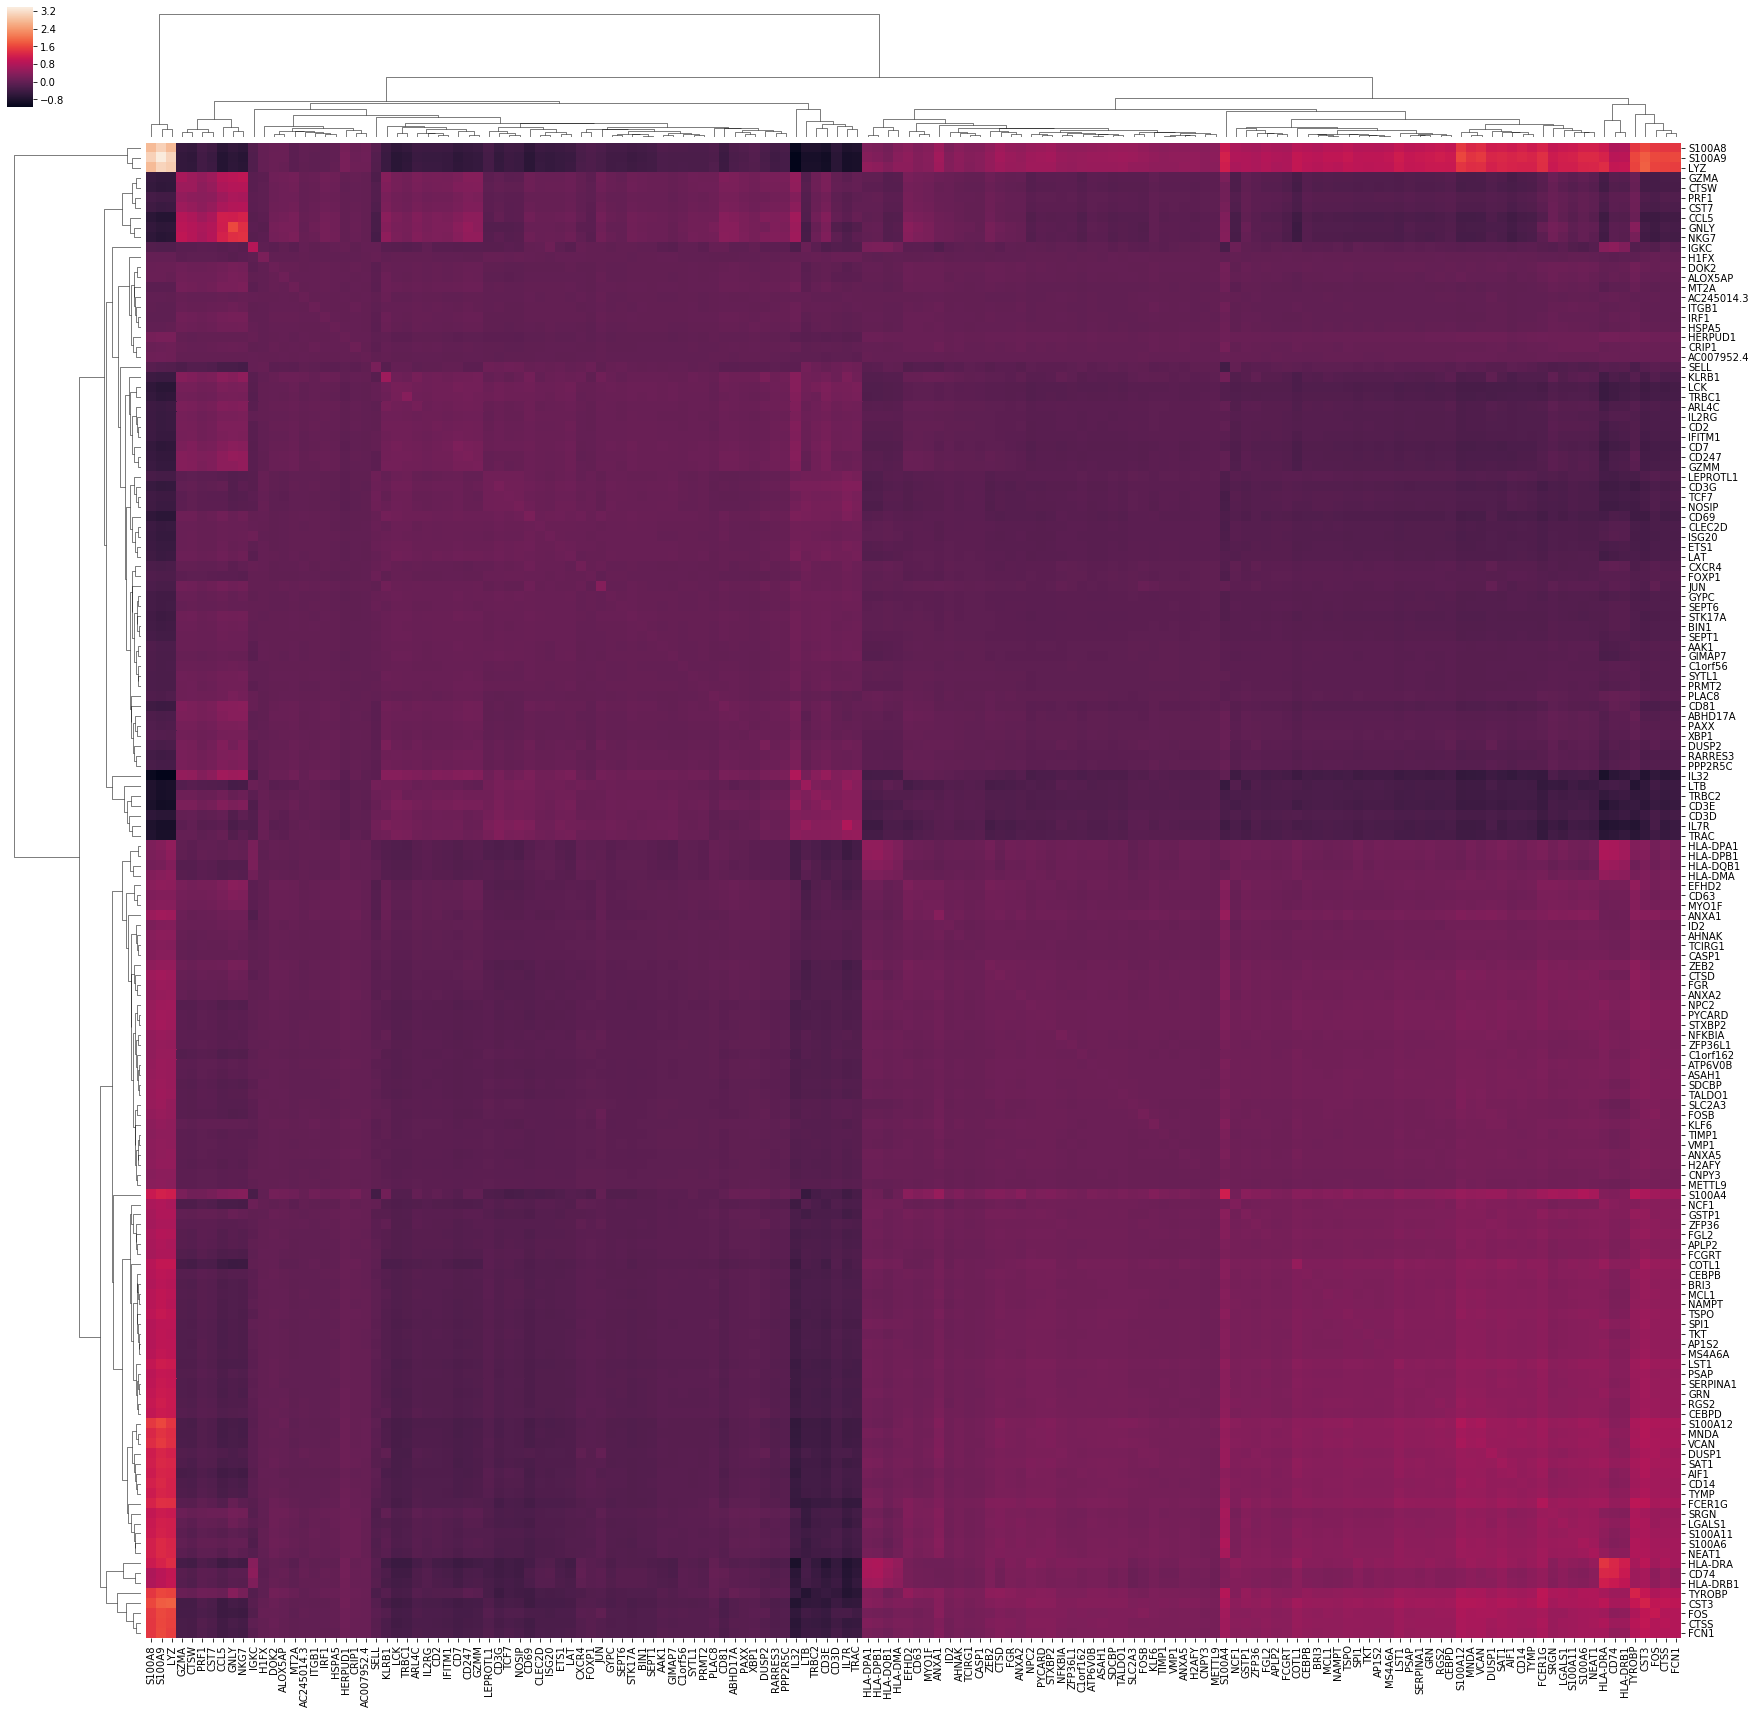

In [573]:
sns.clustermap(metacell_cov, xticklabels=gene_names, yticklabels=gene_names, figsize=(30,30))

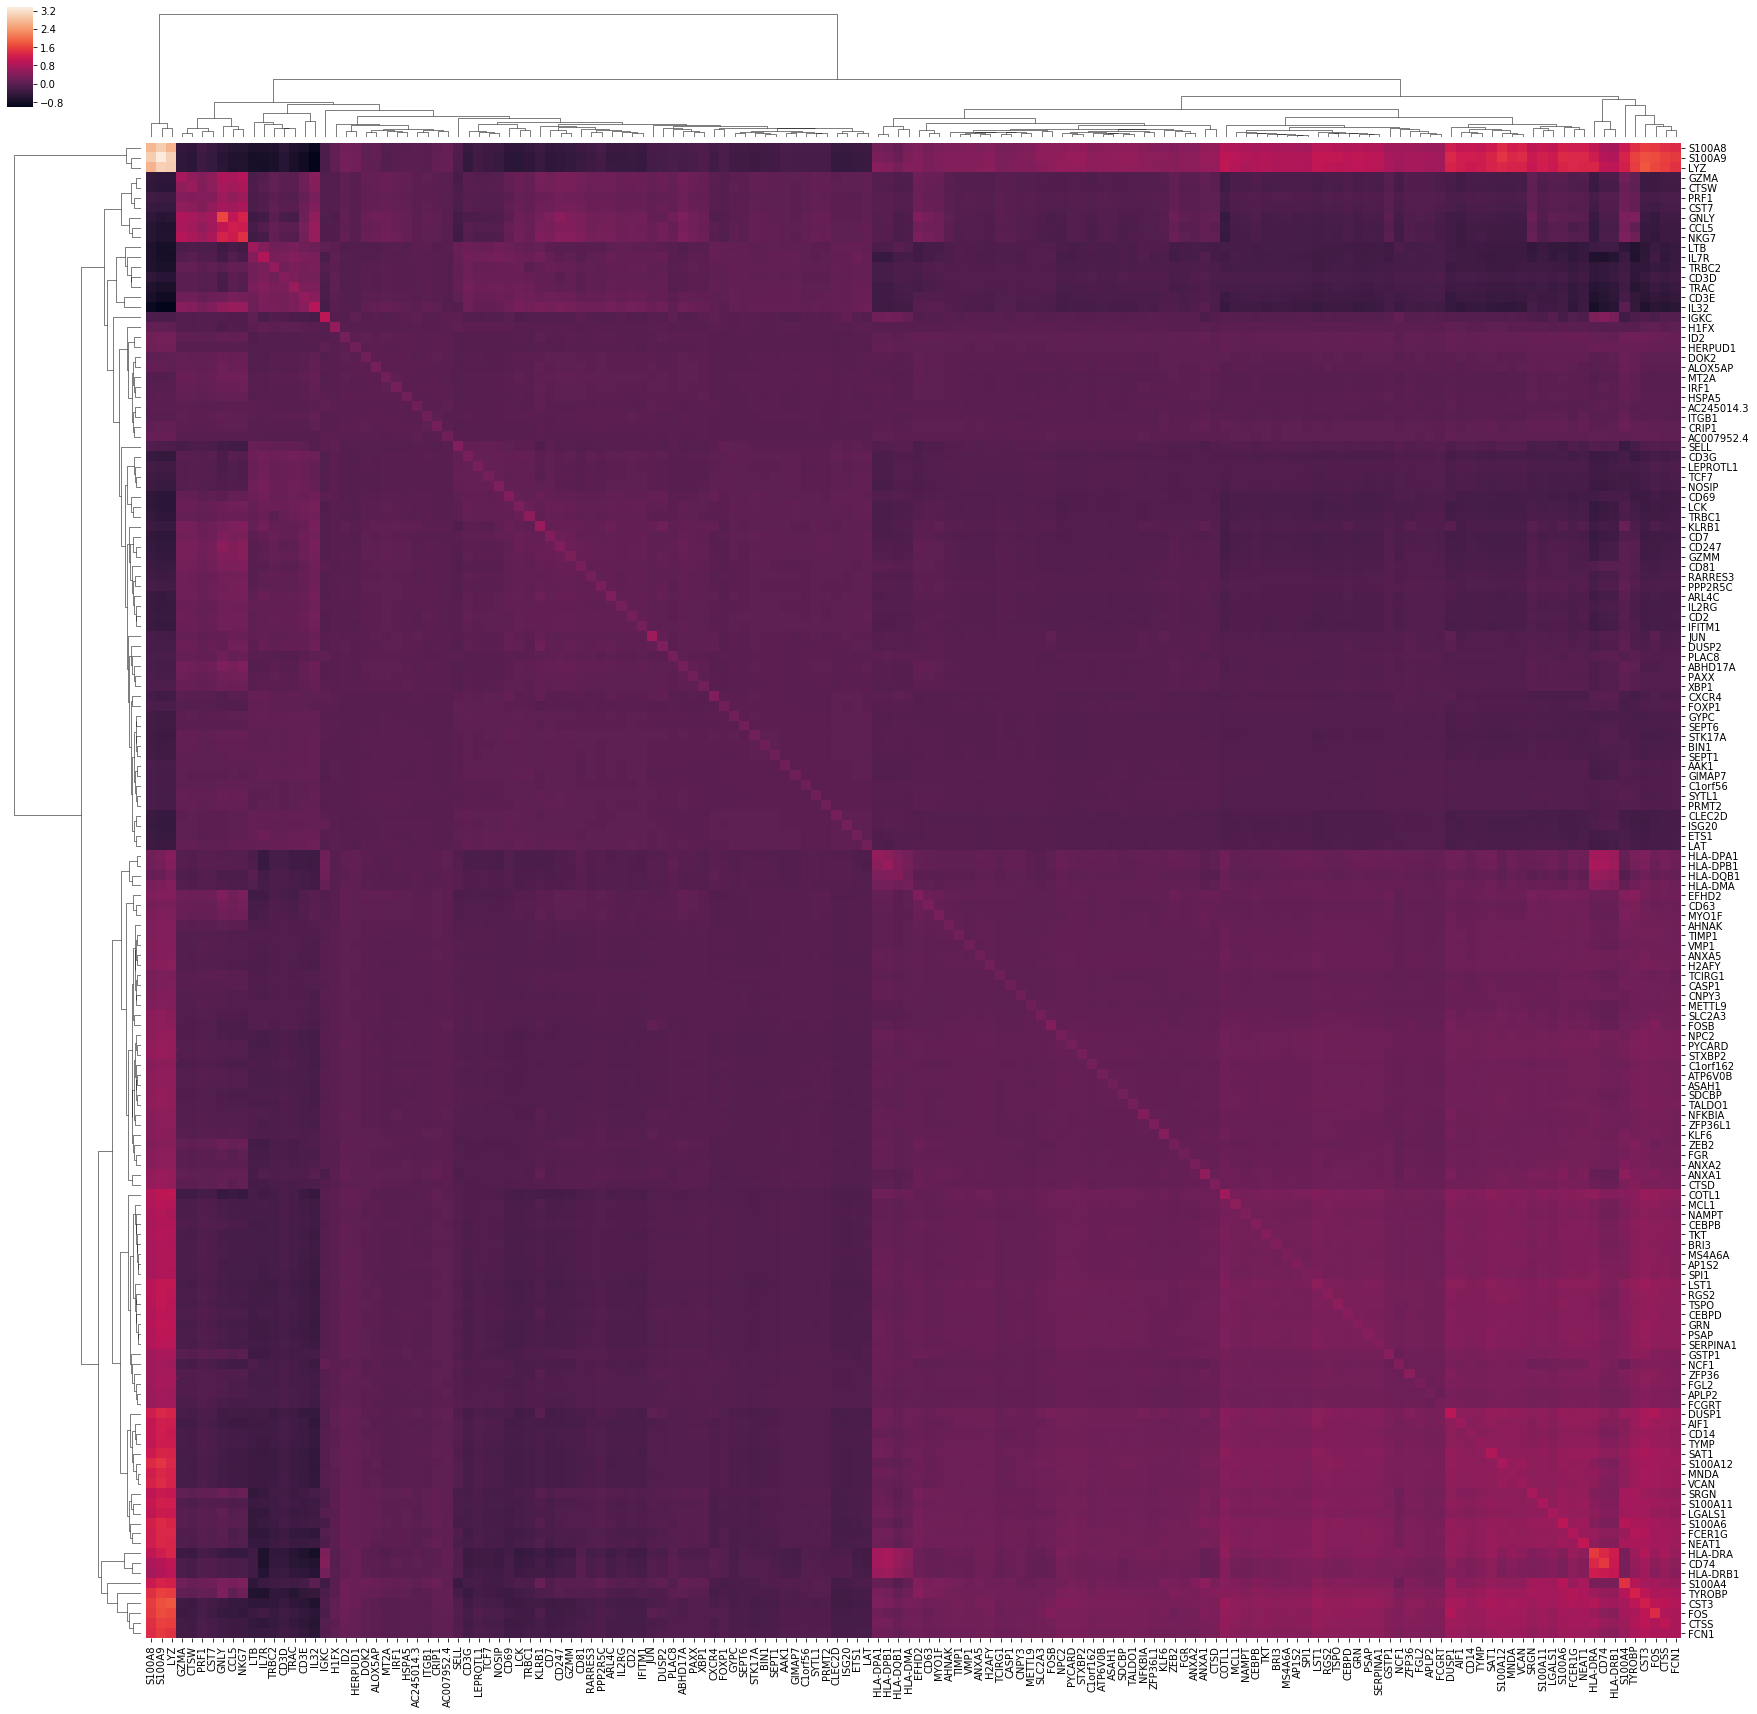

In [556]:
sns.clustermap(full_cov, xticklabels=gene_names, yticklabels=gene_names, figsize=(30,30))

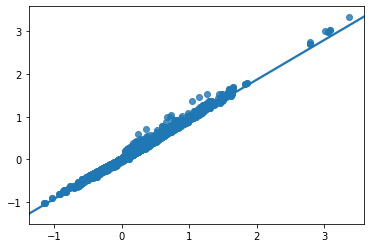

In [574]:
sns.regplot(metacell_cov.ravel(), full_cov.ravel())

In [530]:
u1, s1, v1 = svd(metacell_ad_2[:,metacell_ad_2.var.highly_variable.values].X)

plt.plot(s[:50], label="full")

NameError: name 'svd' is not defined

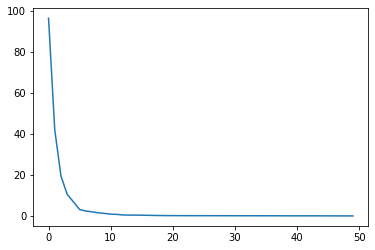

In [44]:
plt.plot(s1[:50], label="metacells")

In [353]:
print(metacell_ad)

AnnData object with n_obs × n_vars = 200 × 15343 
    obs: 'n_genes', 'percent_mito', 'cluster', 'celltype', 'n_counts', 'size'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'


In [575]:
save_fname = os.path.join("..", "ot", "data", "pbmc", "rna_10k_metacells.h5ad")
metacell_ad.write_h5ad(save_fname)

... storing 'celltype' as categorical
